In [9]:
import pandas as pd
import requests
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def load(offset_,limit_):
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    res = requests.get(url)
    objects_data = res.json()
    return objects_data['data']['list']
def load_one(idObj):
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{idObj}'
    res = requests.get(url)
    objects_data = res.json()
    return objects_data['data']
offset= 0
limit= 2000
first = load(offset,limit)
a=len(first)
while a>0:
    offset+=2000
    second = load(offset,limit)
    a=len(second)
    first+=second
df = pd.json_normalize(first)
a = []
for i in range(0,len(df)):
    a.append(load_one(df['objId'].iloc[i]))
df_detal = pd.json_normalize(a)
h = df_detal.sort_values(by='region', ascending=False)



In [10]:
#средняя цена за квадратный метр по регионам

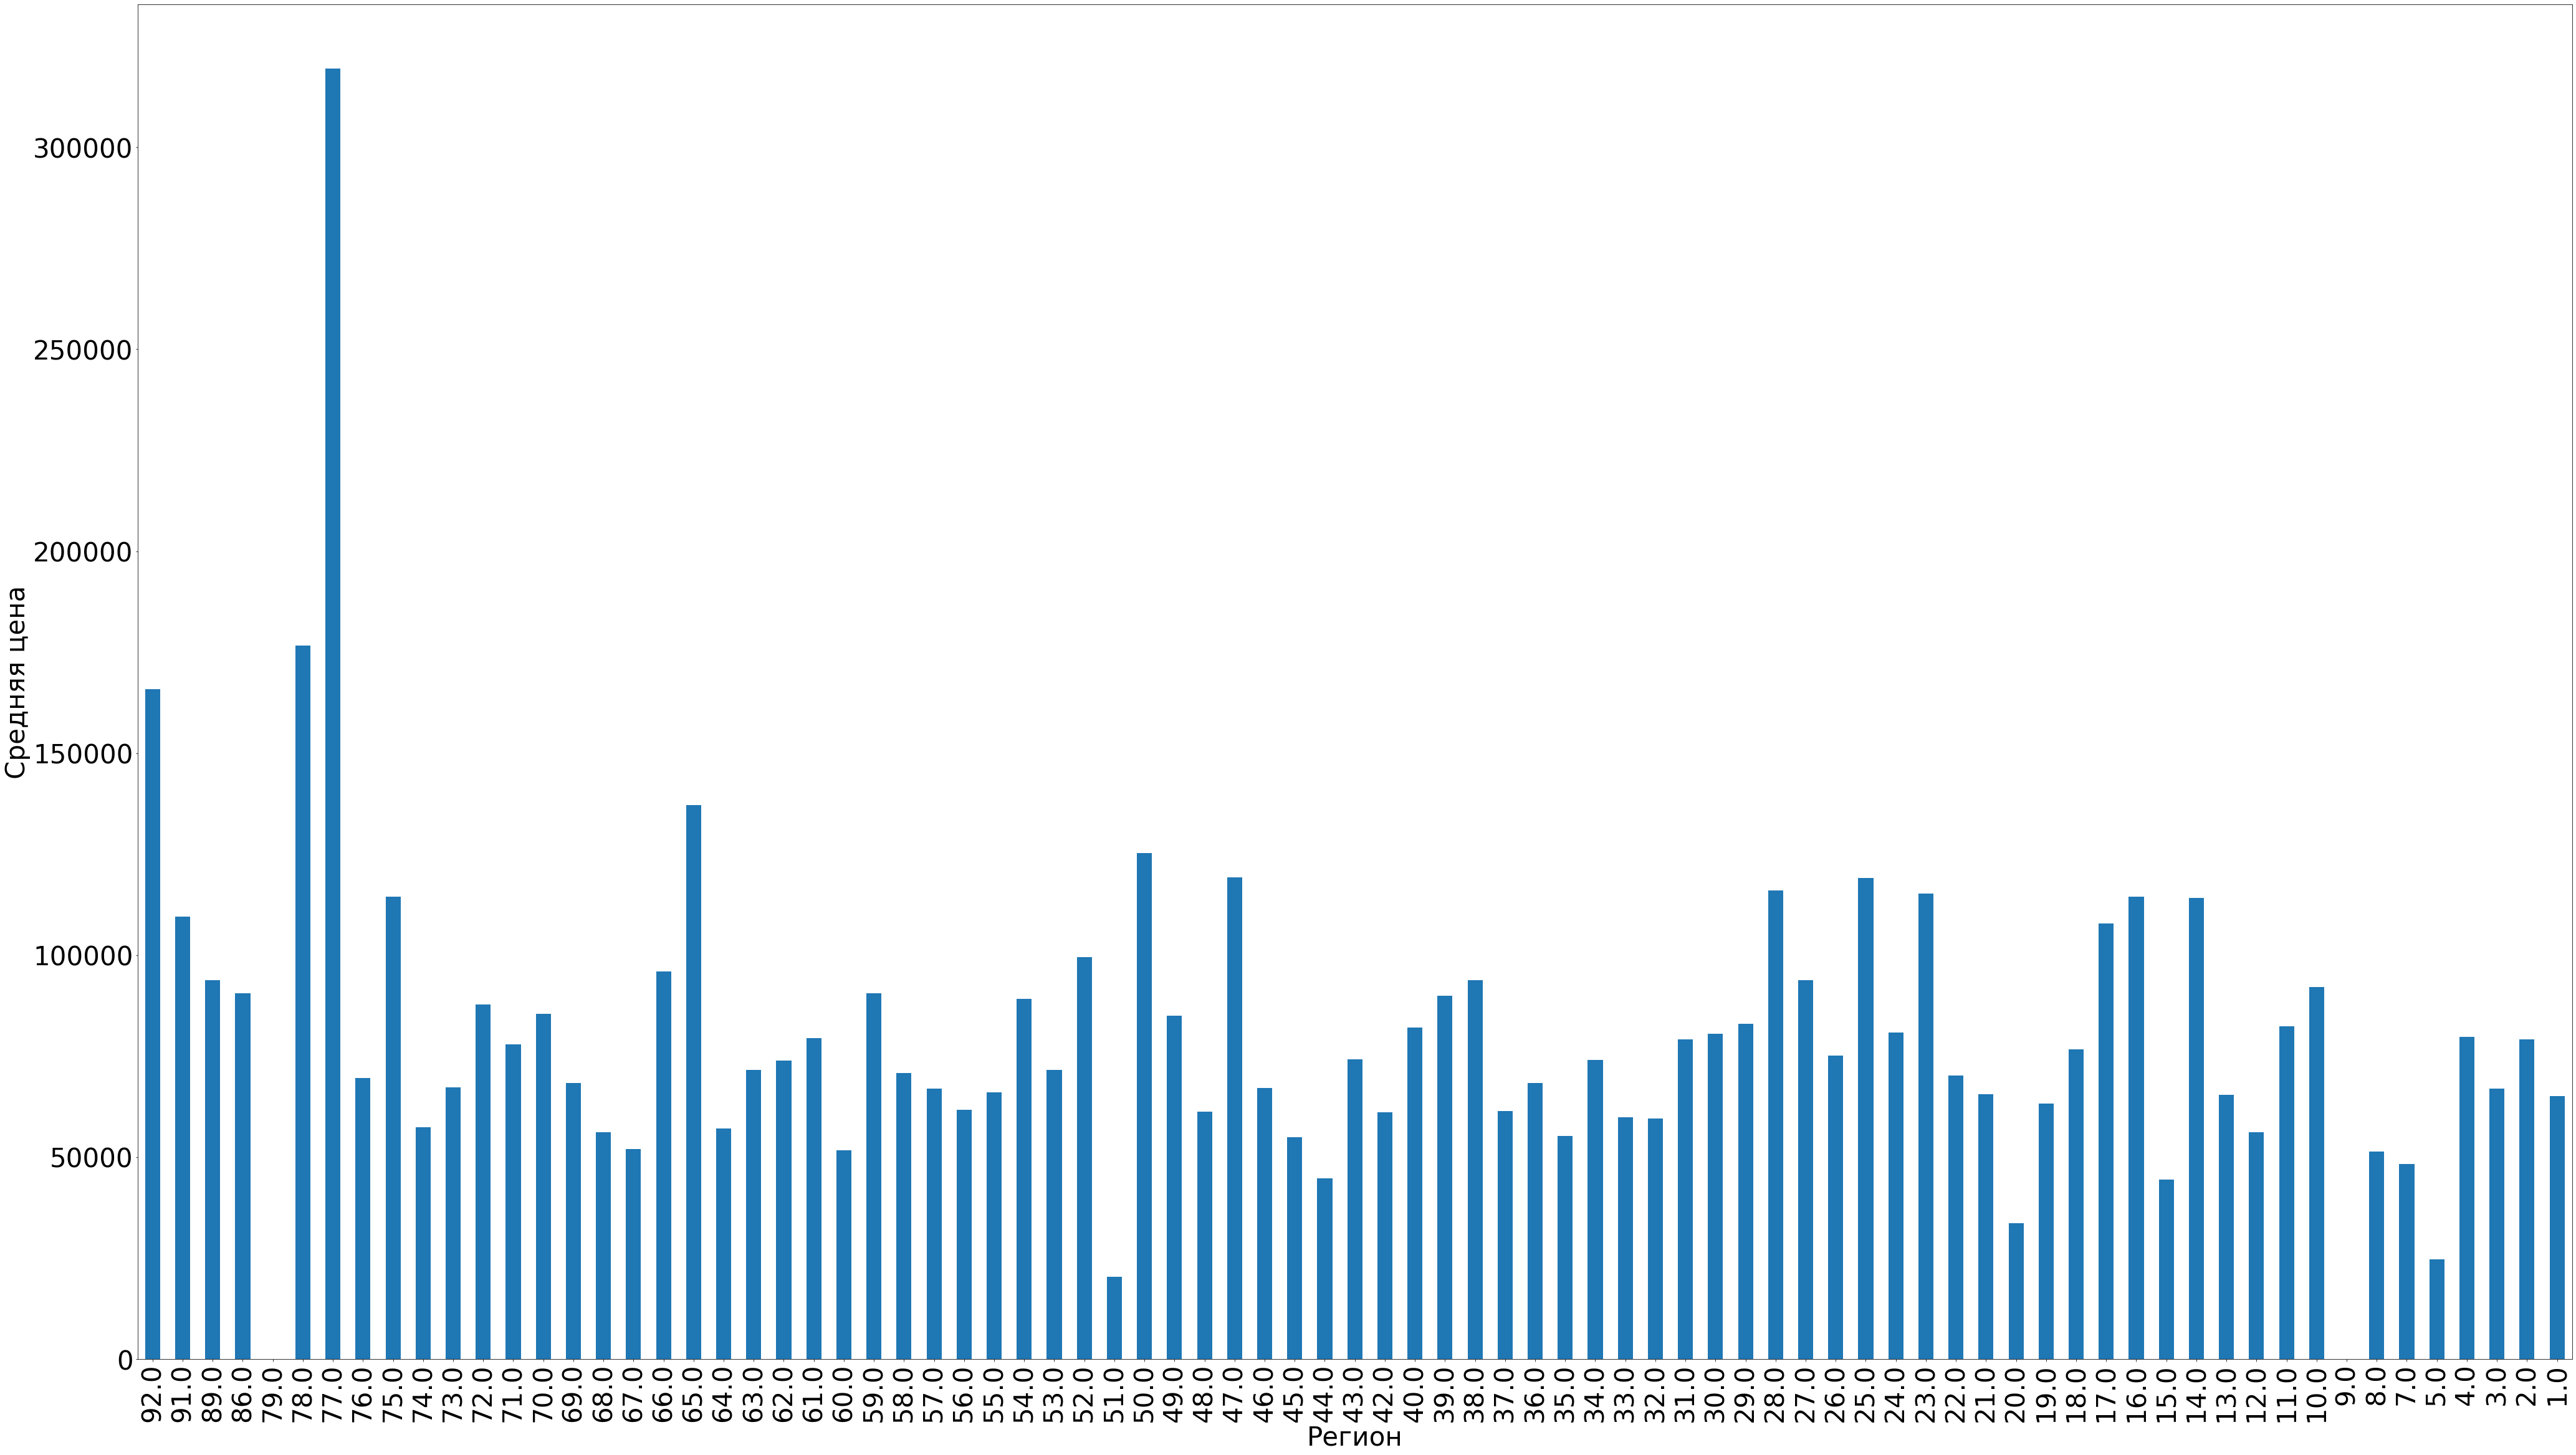

In [11]:
h = h.loc[h['objPriceAvg'] != 0]
h = h.reset_index(drop=True)
g1 = 0
frame = pd.DataFrame({'region': [],'price': []})
for f in range(len(h)):
    g2 = h['region'][f]
    if g2 != g1:
        h1 = h.loc[h['region'] == g2]
        j = h1["objPriceAvg"].mean()
        #print(j)
        g1 = g2
        frameone = pd.DataFrame({'region': [g2],'objPriceAvg': [j]})
        frame = pd.concat([frame, frameone])
        continue
frame = frame.reset_index(drop=True)
bm_price_series = frame.set_index('region')['objPriceAvg'] 
from pylab import rcParams
rcParams['figure.figsize'] = 70,40
bm_price_series.plot.bar(x = 'region', y= 'objPriceAvg', fontsize=42)
plt.ylabel('Средняя цена', fontsize=42)
plt.xlabel('Регион', fontsize=42)
plt.show()


In [ ]:
#Самое дорогое жилье в регионе 77 - Москва, самое дешевое в регионе 51 - Мурманская область

In [12]:
#среднее максимальное количество этажей по регионам

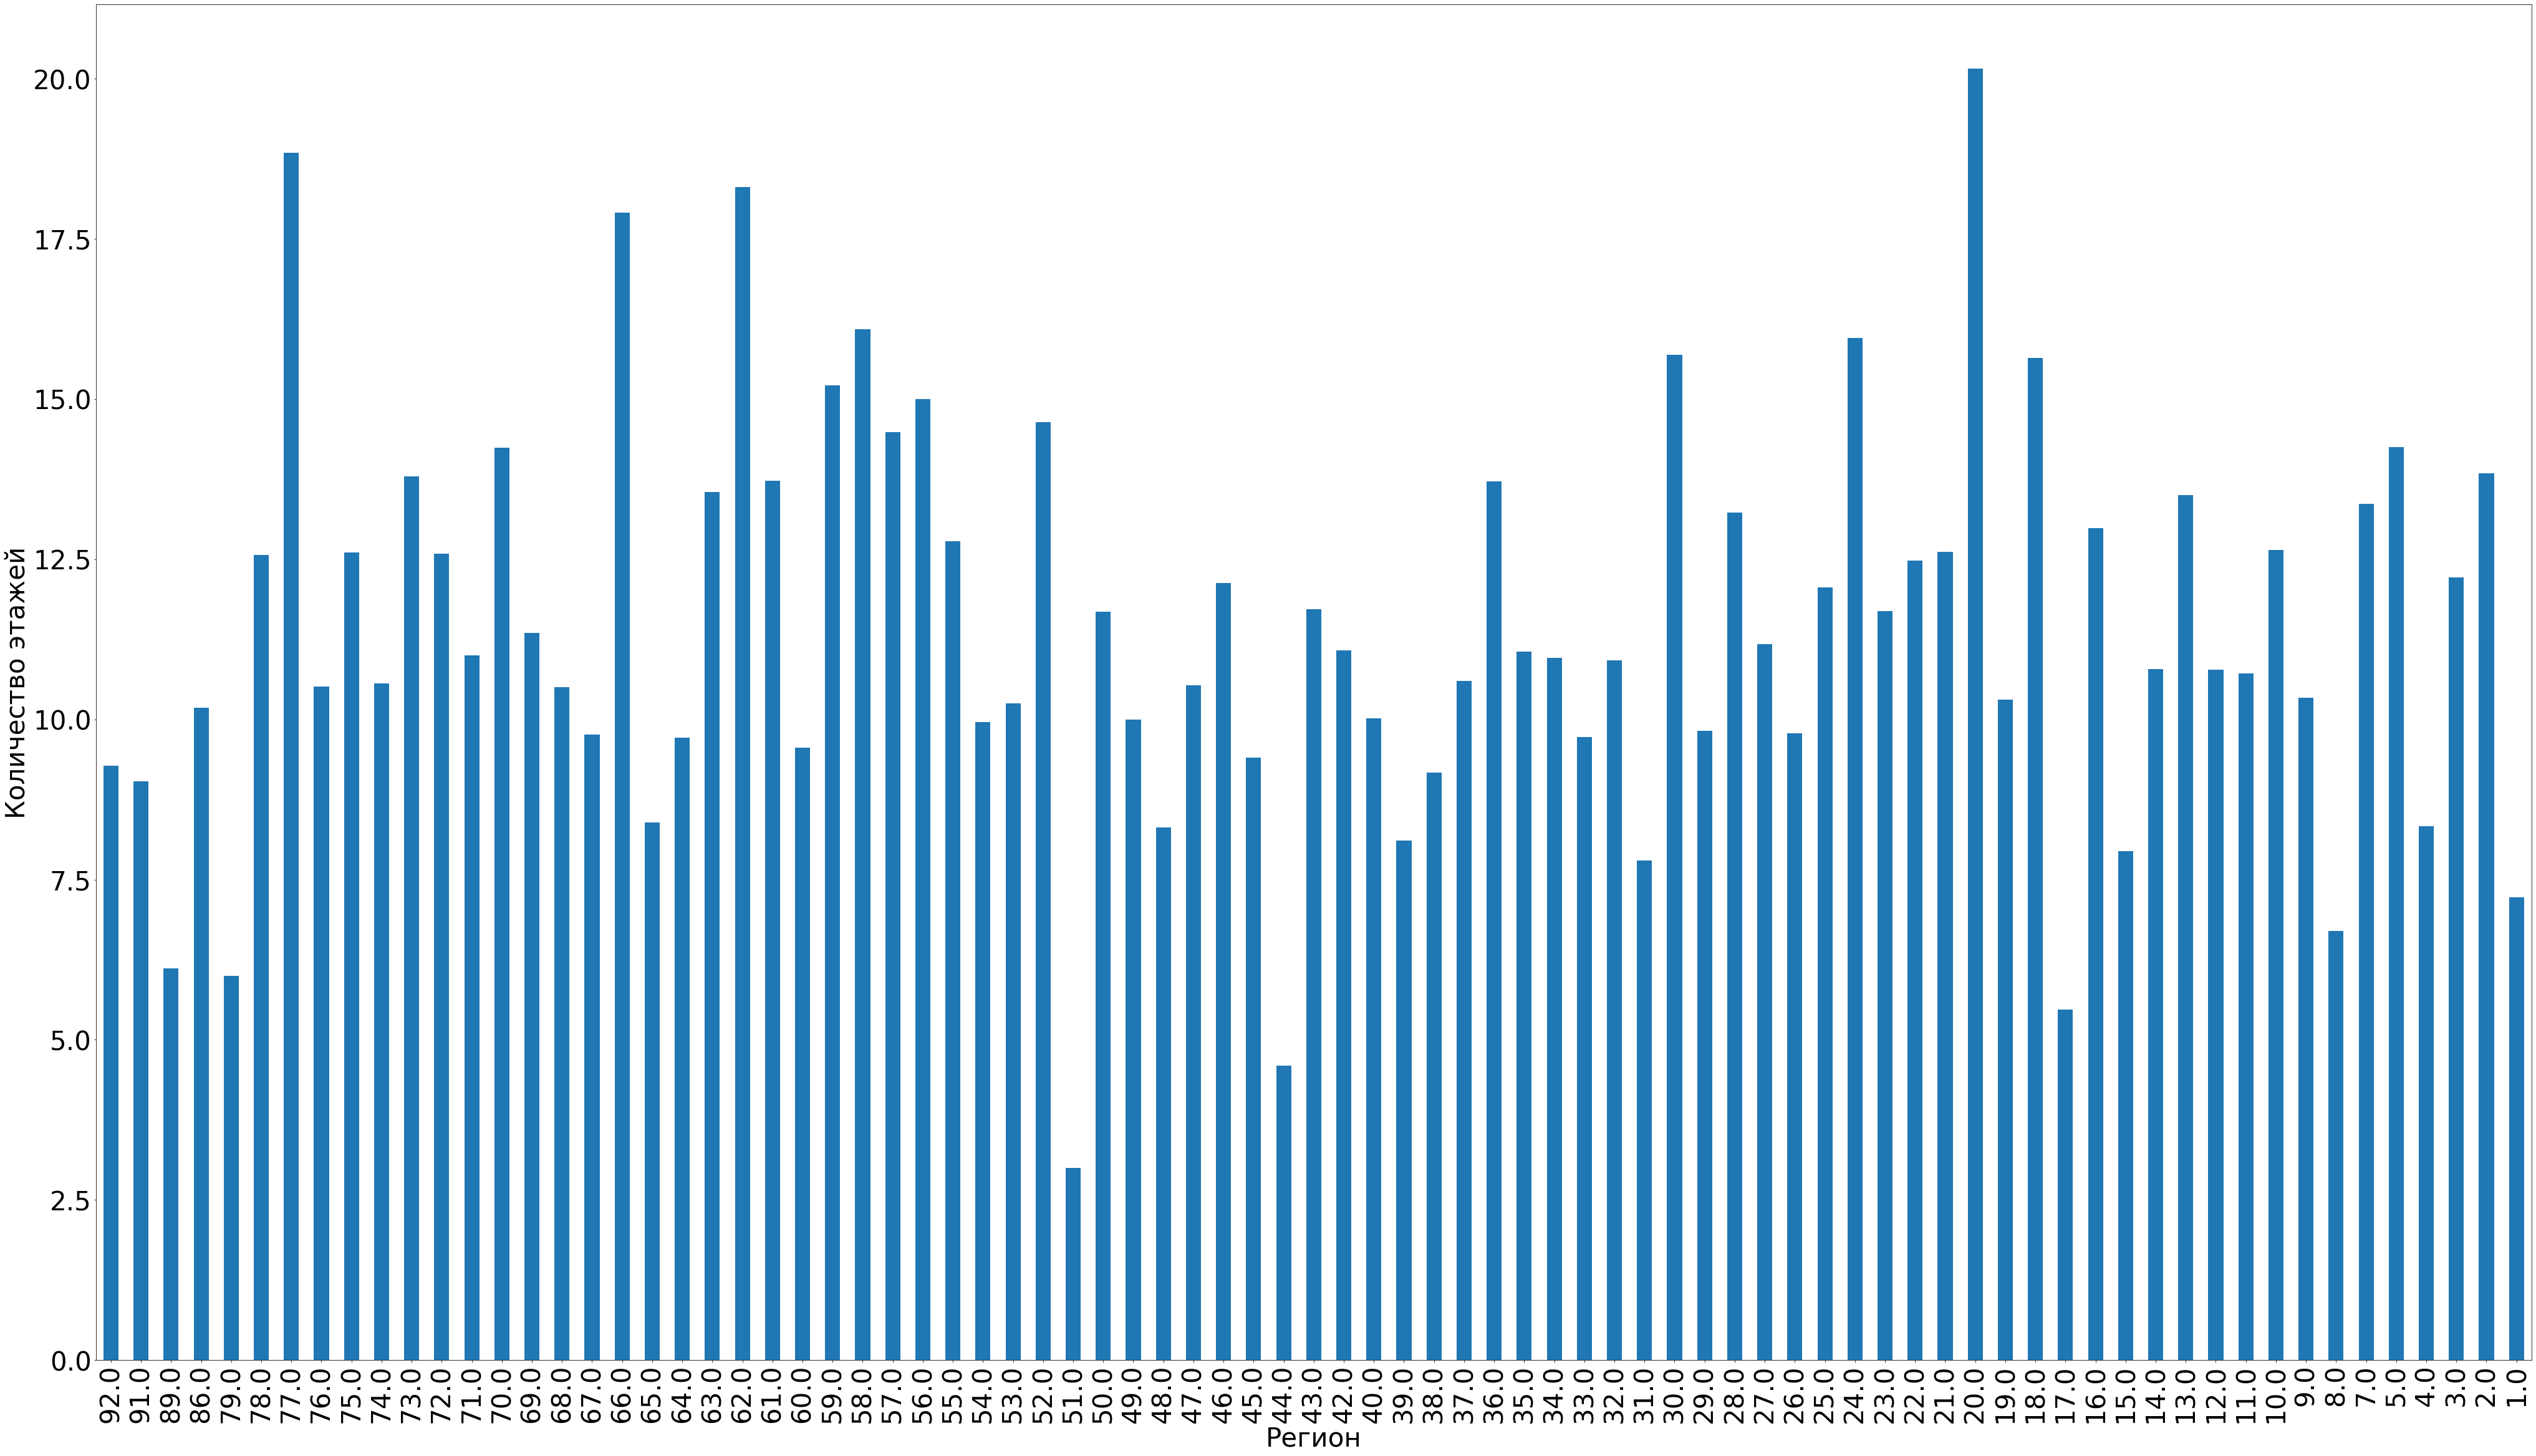

In [13]:
h = h.loc[h['floorMax'] != 0]
h = h.reset_index(drop=True)
g1 = 0
frame = pd.DataFrame({'region': [],'price': []})
for f in range(len(h)):
    g2 = h['region'][f]
    if g2 != g1:
        h1 = h.loc[h['region'] == g2]
        j = h1["floorMax"].mean()
        #print(j)
        g1 = g2
        frameone = pd.DataFrame({'region': [g2],'floorMax': [j]})
        frame = pd.concat([frame, frameone])
        continue
frame = frame.reset_index(drop=True)
bm_price_series = frame.set_index('region')['floorMax'] 
from pylab import rcParams
rcParams['figure.figsize'] = 70,40
bm_price_series.plot.bar(x = 'region', y= 'floorMax', fontsize=42)
plt.ylabel('Количество этажей', fontsize=42)
plt.xlabel('Регион', fontsize=42)
plt.show()

In [ ]:
#Самые высокие дома в регионе 20 - Чеченская Республика, самые низкие в регионе 51 - Мурманская область

In [14]:
#среднее количество квартир по регионам

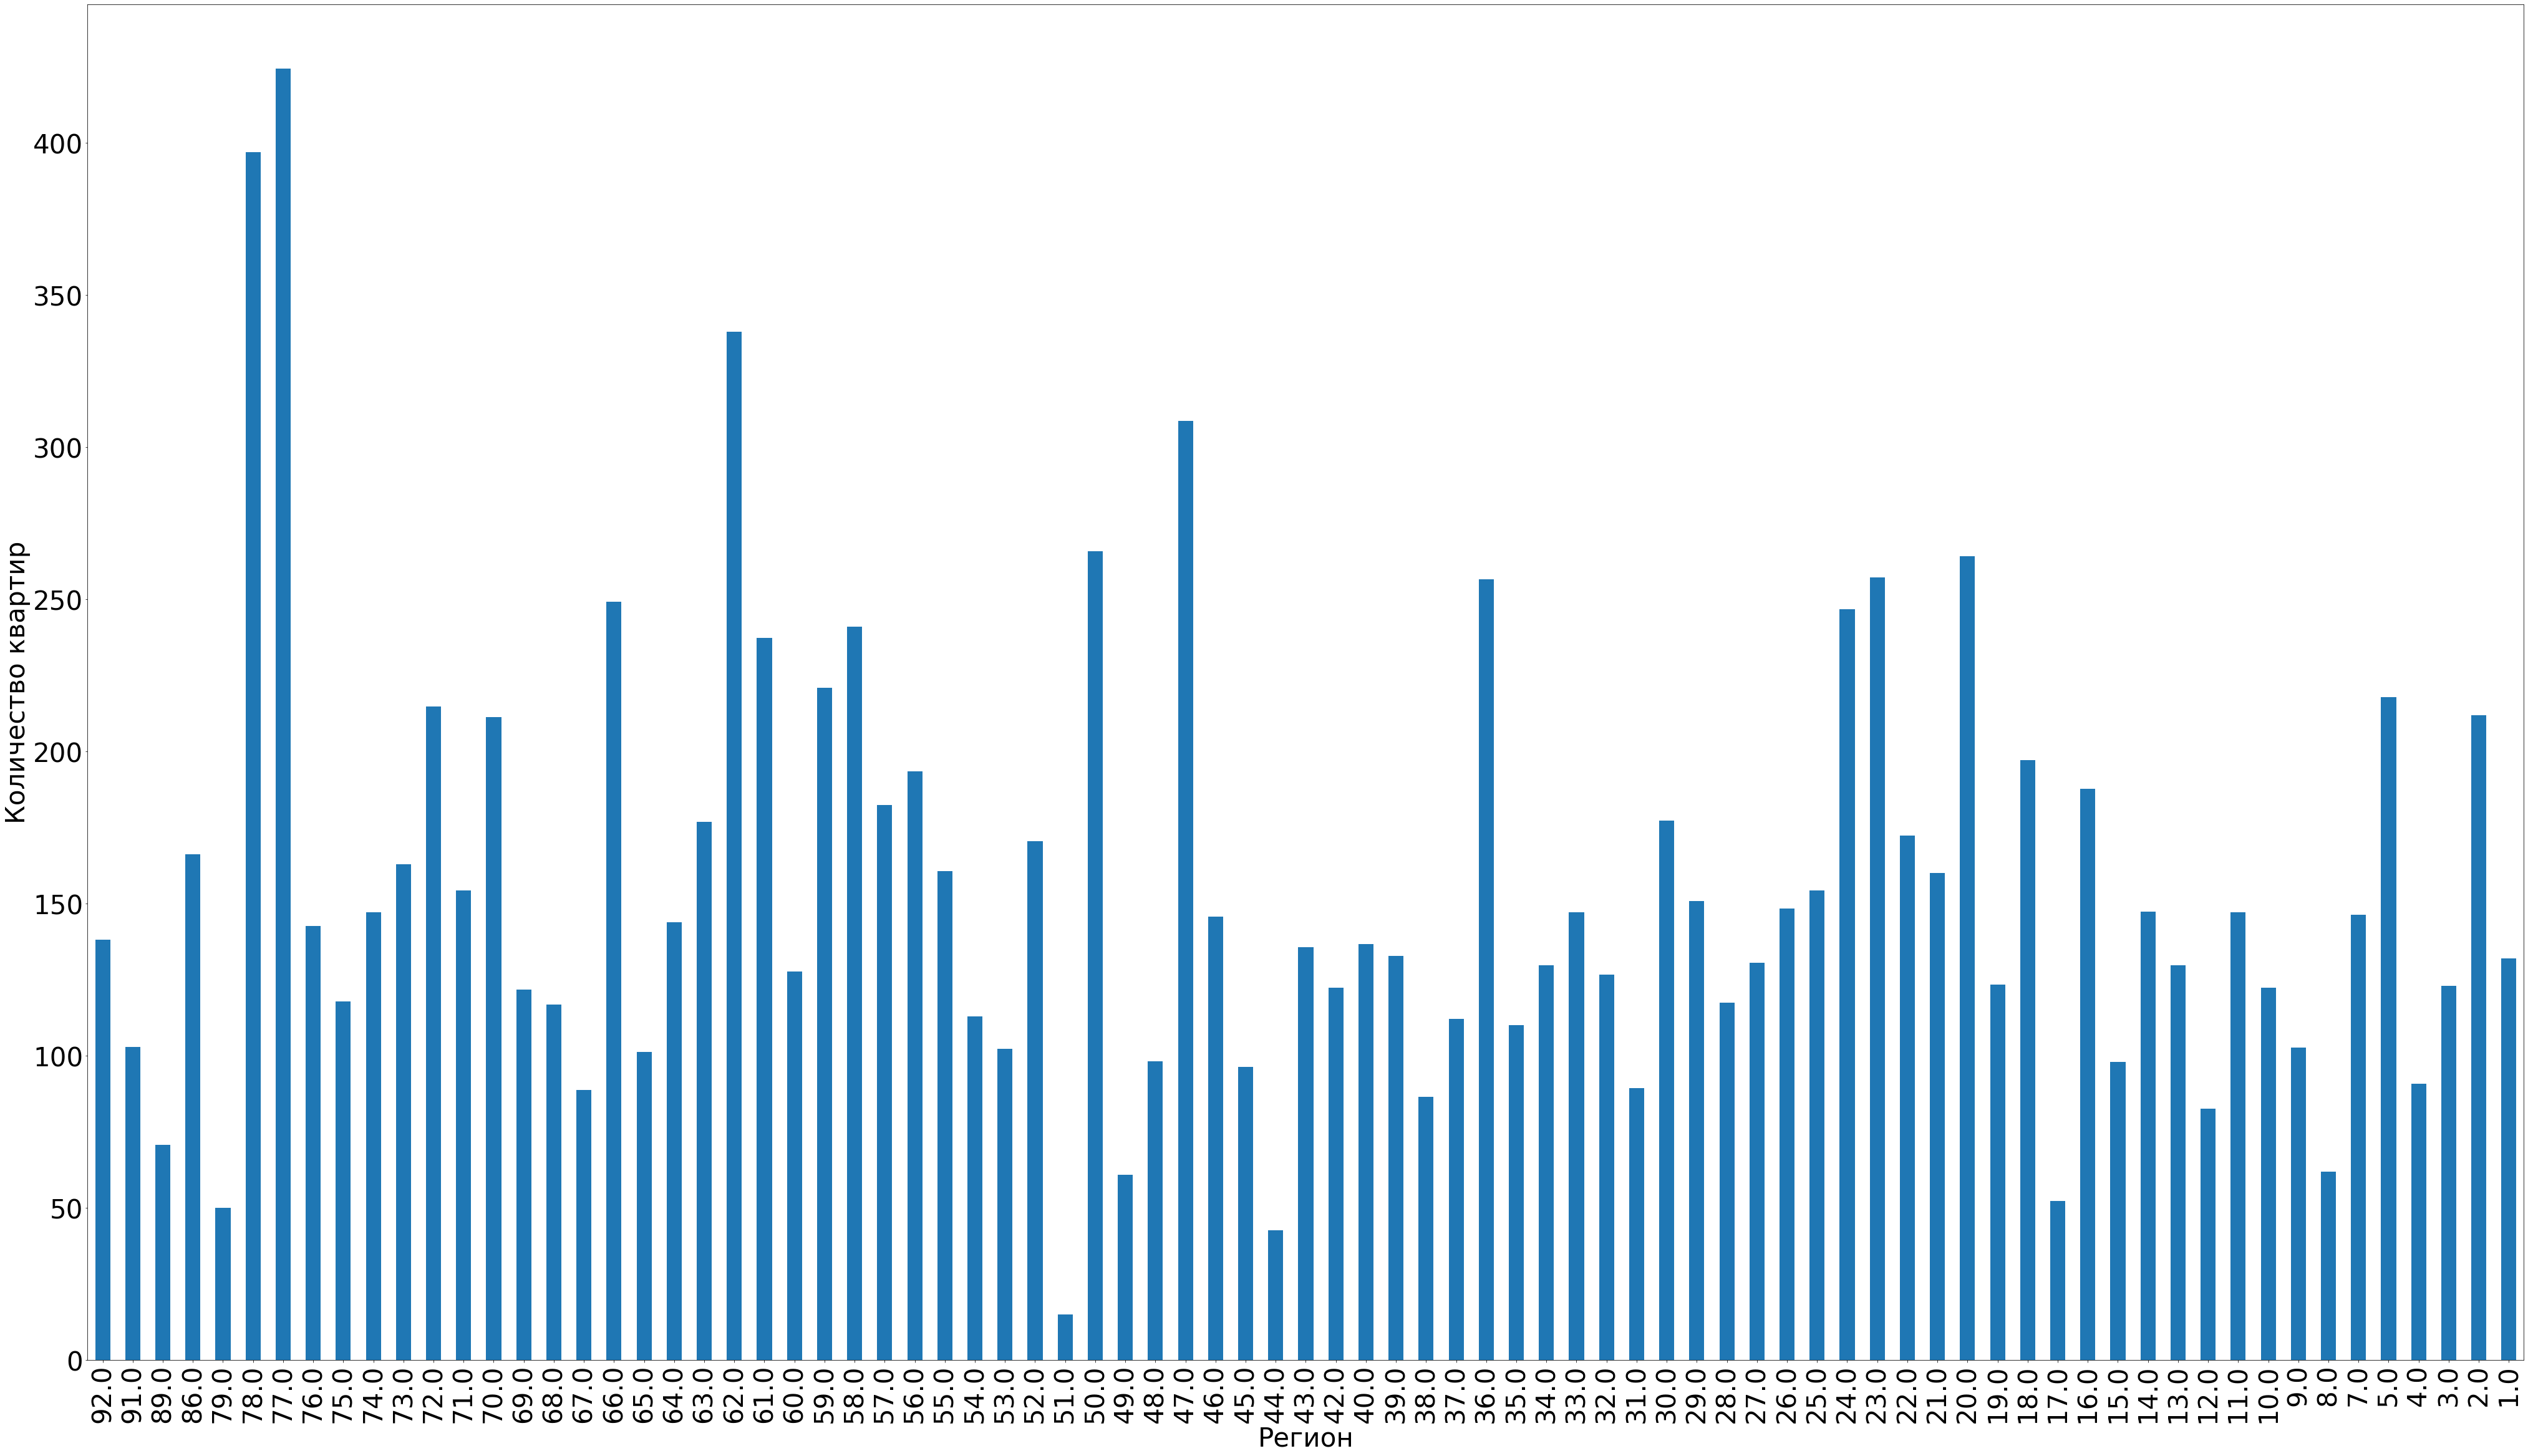

In [15]:
h = h.loc[h['objElemLivingCnt'] != 0]
h = h.reset_index(drop=True)
g1 = 0
frame = pd.DataFrame({'region': [],'price': []})
for f in range(len(h)):
    g2 = h['region'][f]
    if g2 != g1:
        h1 = h.loc[h['region'] == g2]
        j = h1["objElemLivingCnt"].mean()
        #print(j)
        g1 = g2
        frameone = pd.DataFrame({'region': [g2],'objElemLivingCnt': [j]})
        frame = pd.concat([frame, frameone])
        continue
frame = frame.reset_index(drop=True)
bm_price_series = frame.set_index('region')['objElemLivingCnt'] 
from pylab import rcParams
rcParams['figure.figsize'] = 70,40
bm_price_series.plot.bar(x = 'region', y= 'objElemLivingCnt', fontsize=42)
plt.ylabel('Количество квартир', fontsize=42)
plt.xlabel('Регион', fontsize=42)
plt.show()

In [ ]:
#Больше всего квартир в регионе 77 - Москва, меньше всего в регионе 51 - Мурманская область

In [16]:
#средняя жилплощадь по регионам

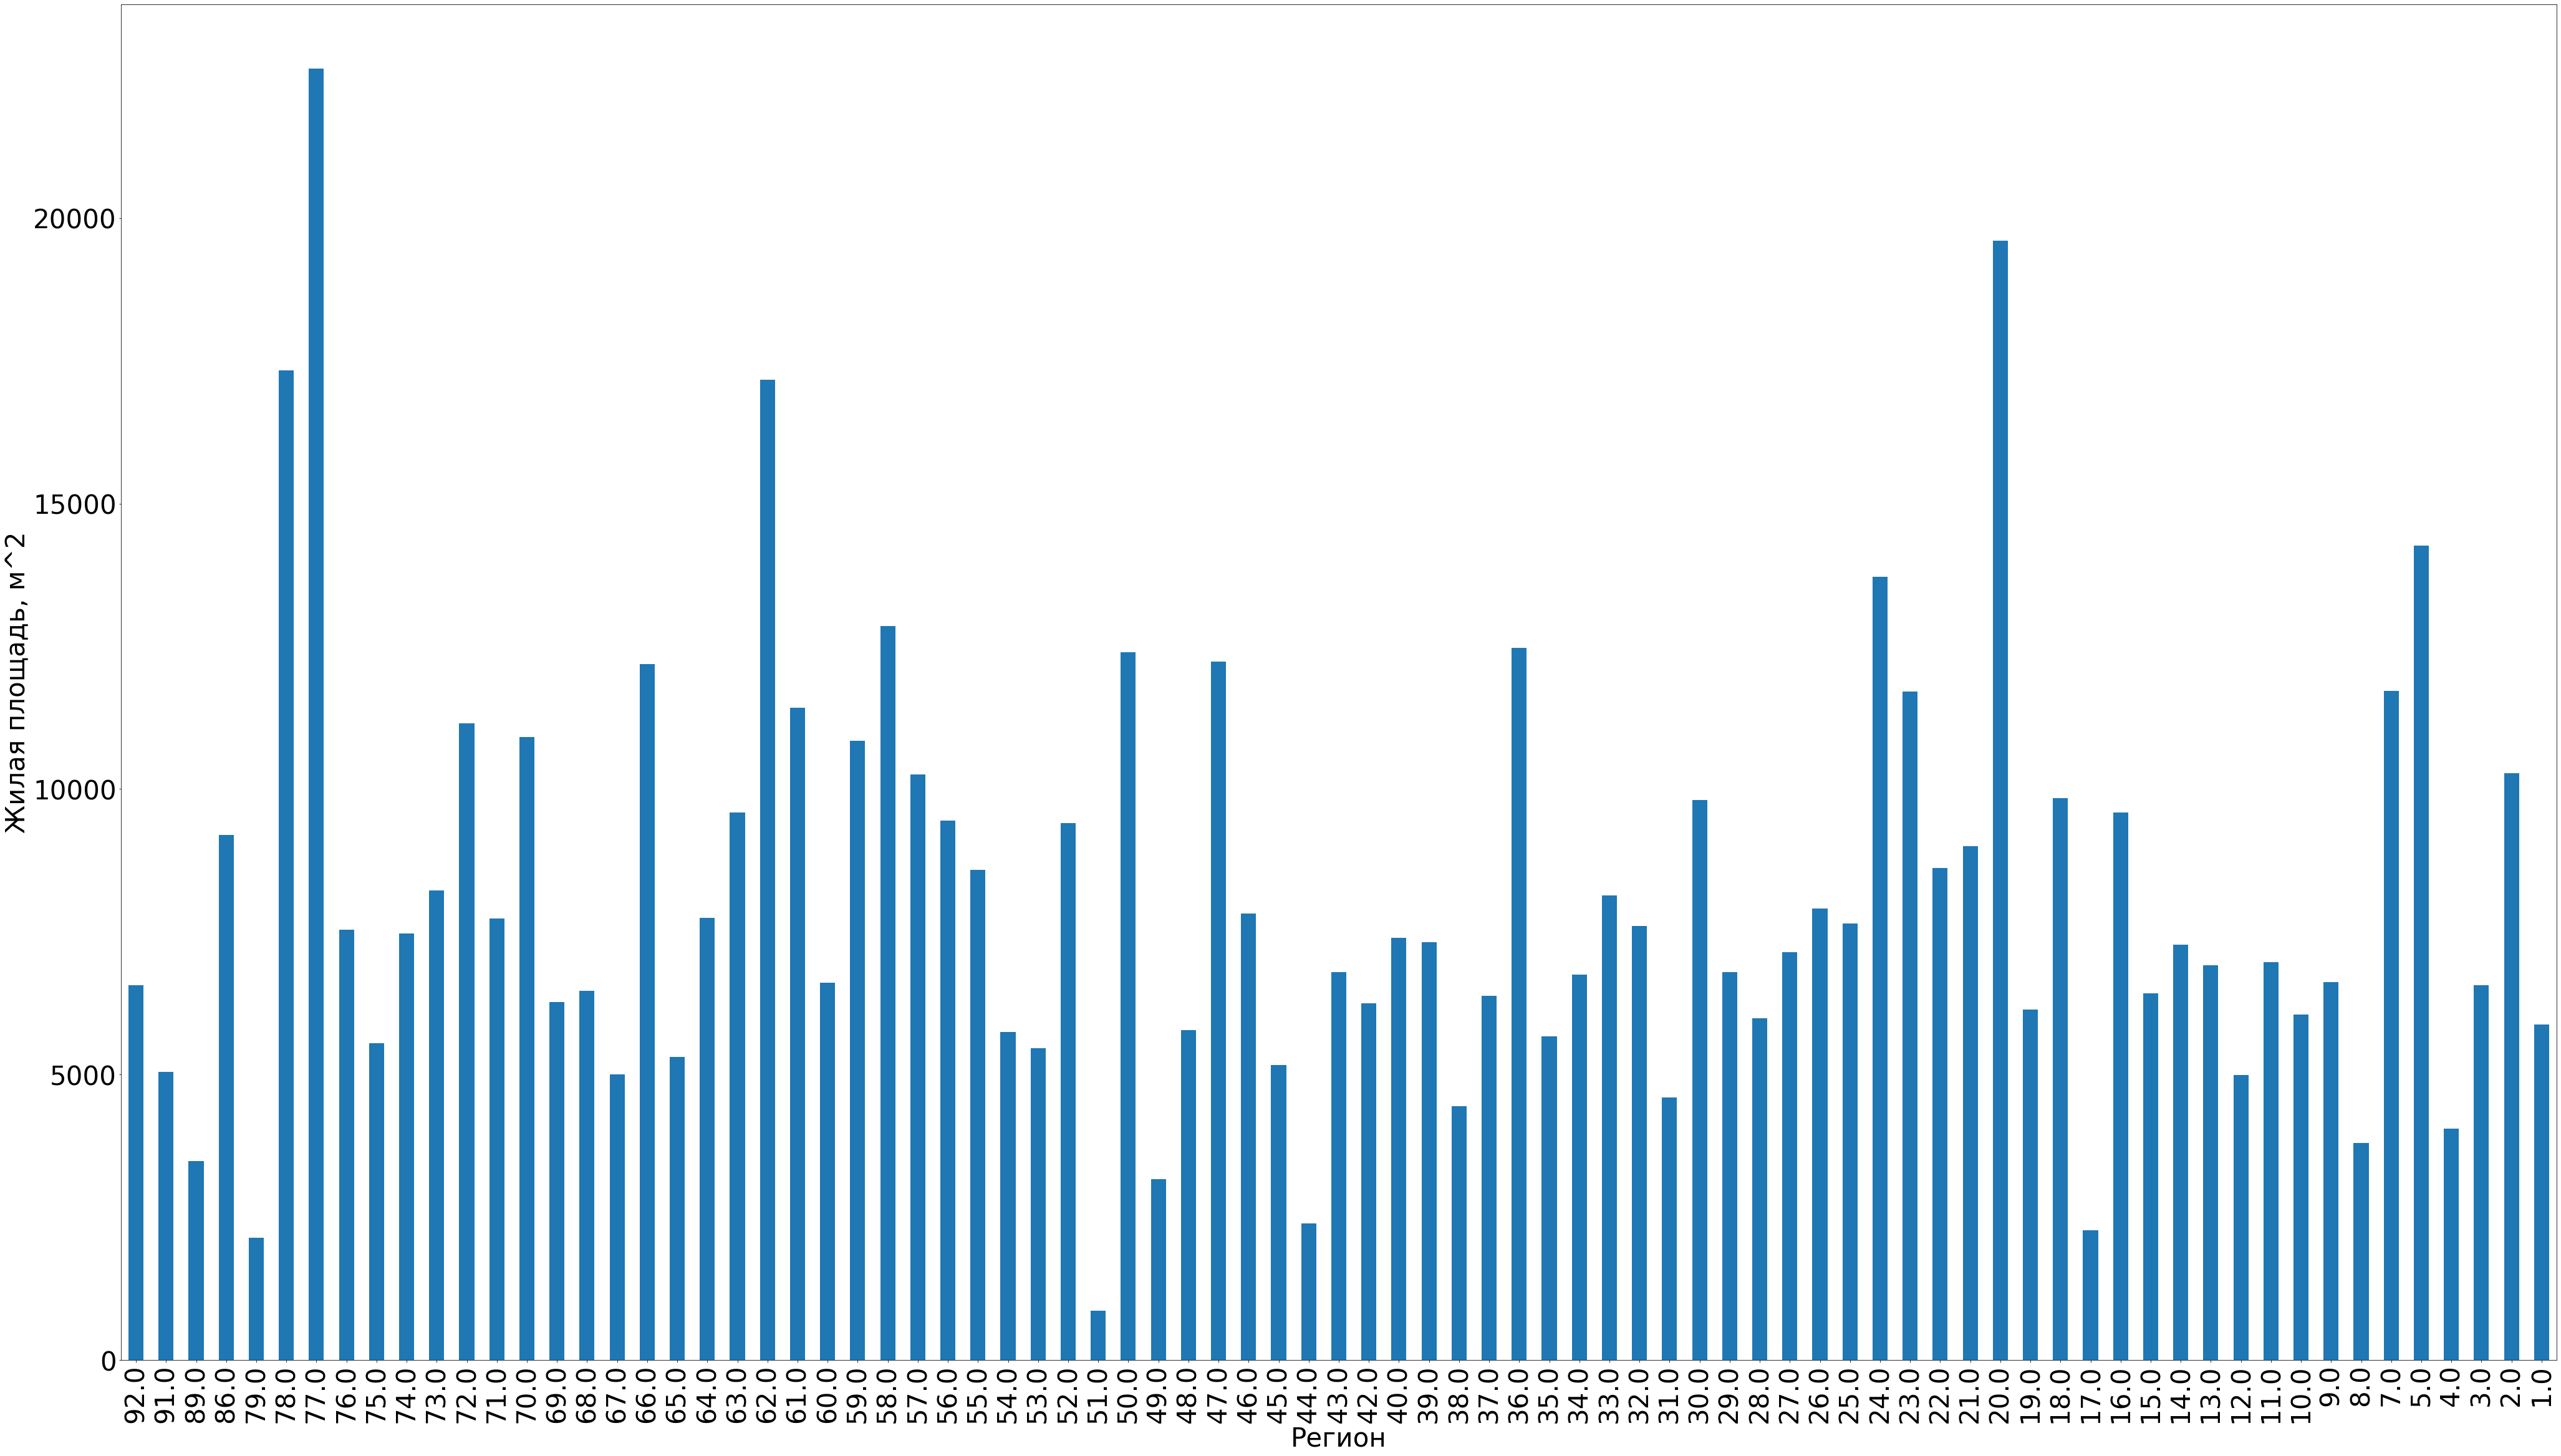

In [17]:
h = h.loc[h['objSquareLiving'] != 0]
h = h.reset_index(drop=True)
g1 = 0
frame = pd.DataFrame({'region': [],'price': []})
for f in range(len(h)):
    g2 = h['region'][f]
    if g2 != g1:
        h1 = h.loc[h['region'] == g2]
        j = h1["objSquareLiving"].mean()
        #print(j)
        g1 = g2
        frameone = pd.DataFrame({'region': [g2],'objSquareLiving': [j]})
        frame = pd.concat([frame, frameone])
        continue
frame = frame.reset_index(drop=True)
bm_price_series = frame.set_index('region')['objSquareLiving'] 
from pylab import rcParams
rcParams['figure.figsize'] = 70,40
bm_price_series.plot.bar(x = 'region', y= 'objSquareLiving', fontsize=42)
plt.ylabel('Жилая площадь, м^2', fontsize=42)
plt.xlabel('Регион', fontsize=42)
plt.show()

In [ ]:
#Больше всего жилплощади в регионе 77 - Москва, меньше всего в регионе 51 - Мурманская область

In [18]:
#среднее количество парковочных мест по регионам

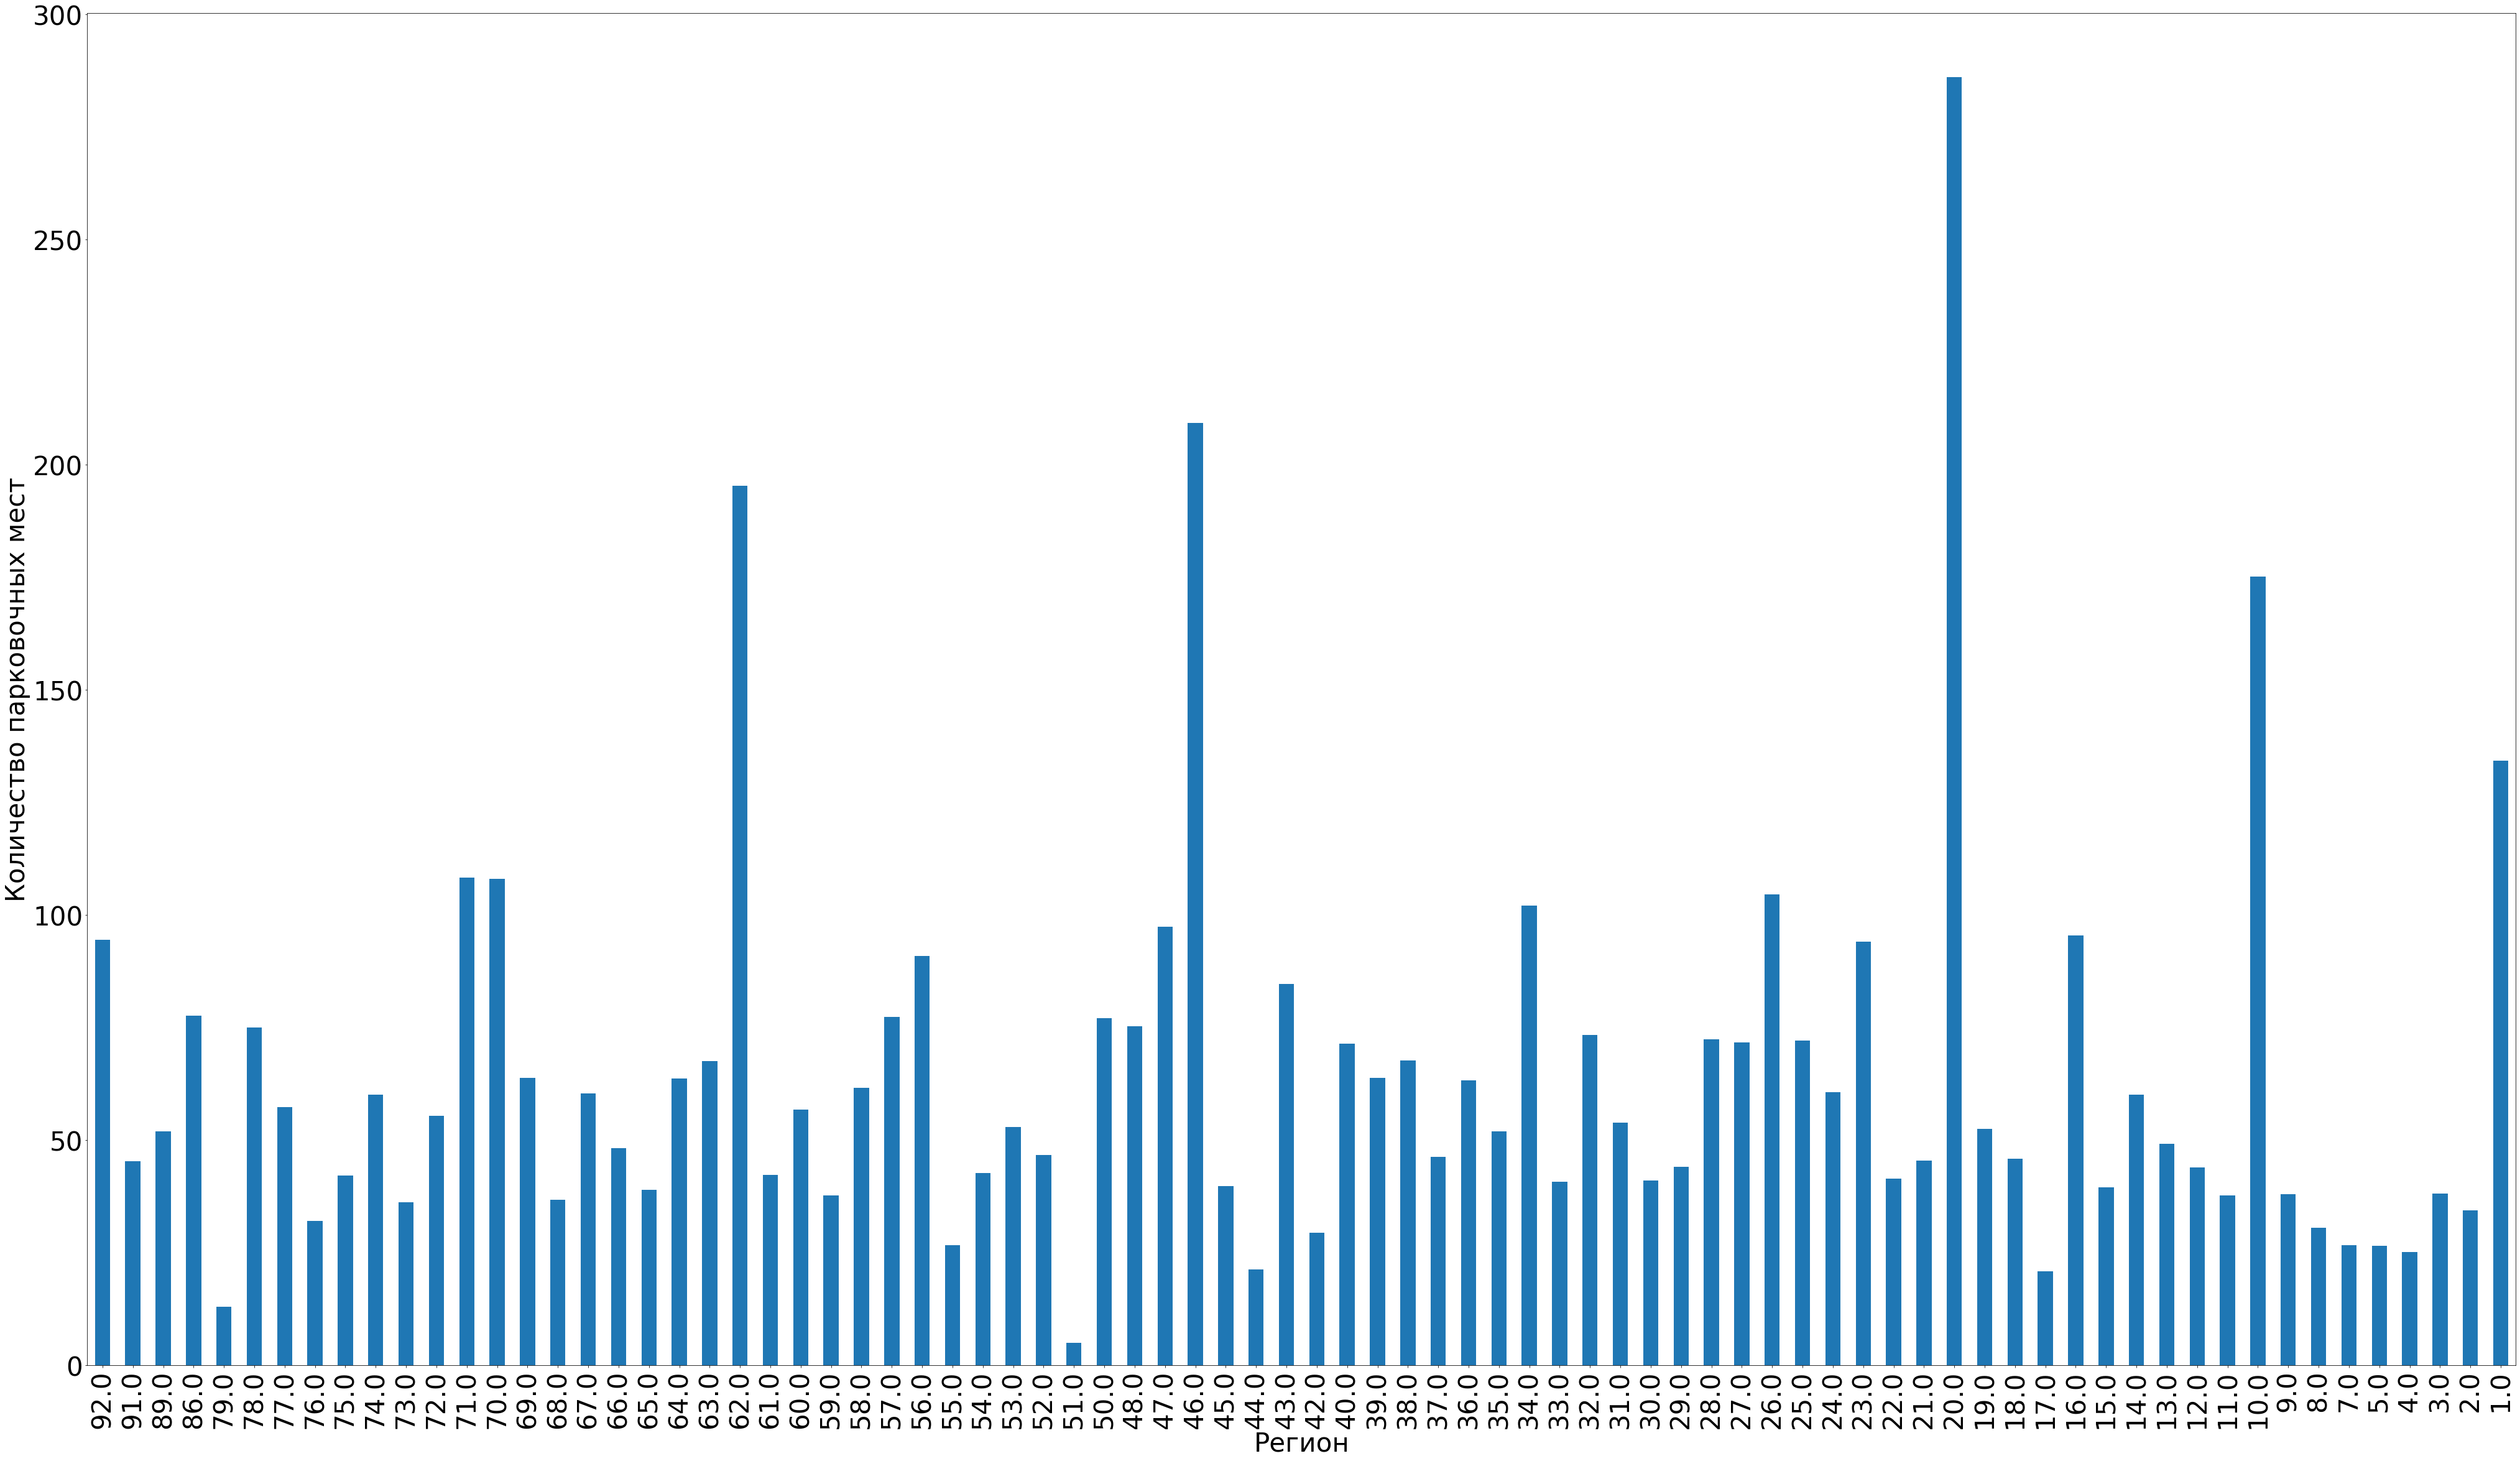

In [19]:
h = h.loc[h['objInfrstrObjPrkngCnt'] != 0]
h = h.reset_index(drop=True)
g1 = 0
frame = pd.DataFrame({'region': [],'price': []})
for f in range(len(h)):
    g2 = h['region'][f]
    if g2 != g1:
        h1 = h.loc[h['region'] == g2]
        j = h1["objInfrstrObjPrkngCnt"].mean()
        #print(j)
        g1 = g2
        frameone = pd.DataFrame({'region': [g2],'objInfrstrObjPrkngCnt': [j]})
        frame = pd.concat([frame, frameone])
        continue
frame = frame.reset_index(drop=True)
bm_price_series = frame.set_index('region')['objInfrstrObjPrkngCnt'] 
from pylab import rcParams
rcParams['figure.figsize'] = 70,40
bm_price_series.plot.bar(x = 'region', y= 'objInfrstrObjPrkngCnt', fontsize=42)
plt.ylabel('Количество парковочных мест', fontsize=42)
plt.xlabel('Регион', fontsize=42)
plt.show()

In [ ]:
#Больше всего парковочных мест в регионе 20 - Чеченская Республика, меньше всего в регионе 51 - Мурманская область